<a href="https://colab.research.google.com/github/AndrewstheBuilder/DeepLearning/blob/main/Titanic_Project/Titanic_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


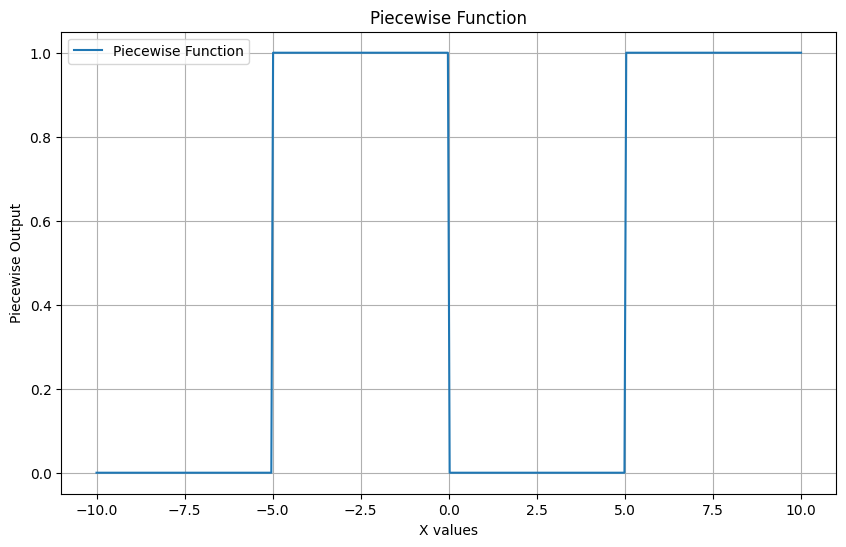

Correlation coefficient: 0.43301405506325596


In [2]:
# Prove to myself that outputs going up and down will give a bad correlation
# Correlation only captures monotonic relationships
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def piecewise(x):
    if x < -5:
        return 0
    elif -5 <= x < 0:
        return 1
    elif 0 <= x < 5:
        return 0
    else:
        return 1

# Generate x values
x = np.linspace(-10, 10, 400)  # 400 points from -10 to 10

# Apply the piecewise function to each x value
y = np.array([piecewise(xi) for xi in x])

# Plotting the Sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Piecewise Function')
plt.title('Piecewise Function')
plt.xlabel('X values')
plt.ylabel('Piecewise Output')
plt.grid(True)
plt.legend()
plt.show()

# Create a DataFrame
data = pd.DataFrame({'X': x, 'Y': y})

# Calculate correlation
correlation = data['X'].corr(data['Y'])
print("Correlation coefficient:", correlation)

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('./drive/MyDrive/Titanic_Challenge/train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
numeric_df = data.select_dtypes(include=[float, int])
numeric_df['Sex'] = data['Sex'].map({'male': 0, 'female':1})
numeric_df['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})

# numeric_df.head()
numeric_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,-0.030555
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.043835
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.012186
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.060606
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.079320
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.063462
Sex,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.118593
Embarked,-0.030555,0.108669,0.043835,0.012186,-0.060606,-0.079320,0.063462,0.118593,1.000000


In [7]:
# data[['Age','Survived']].plot()
# data['Age'].hist(by=data['Survived'], bins=20, alpha=0.7, figsize=(10, 5))
# plt.show()

In [8]:
# Determine Age bands and check correlation with Survived
# print(pd.cut(data['Age'],5))
# print(data['Age'].head())
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [9]:
import matplotlib.pyplot as plt

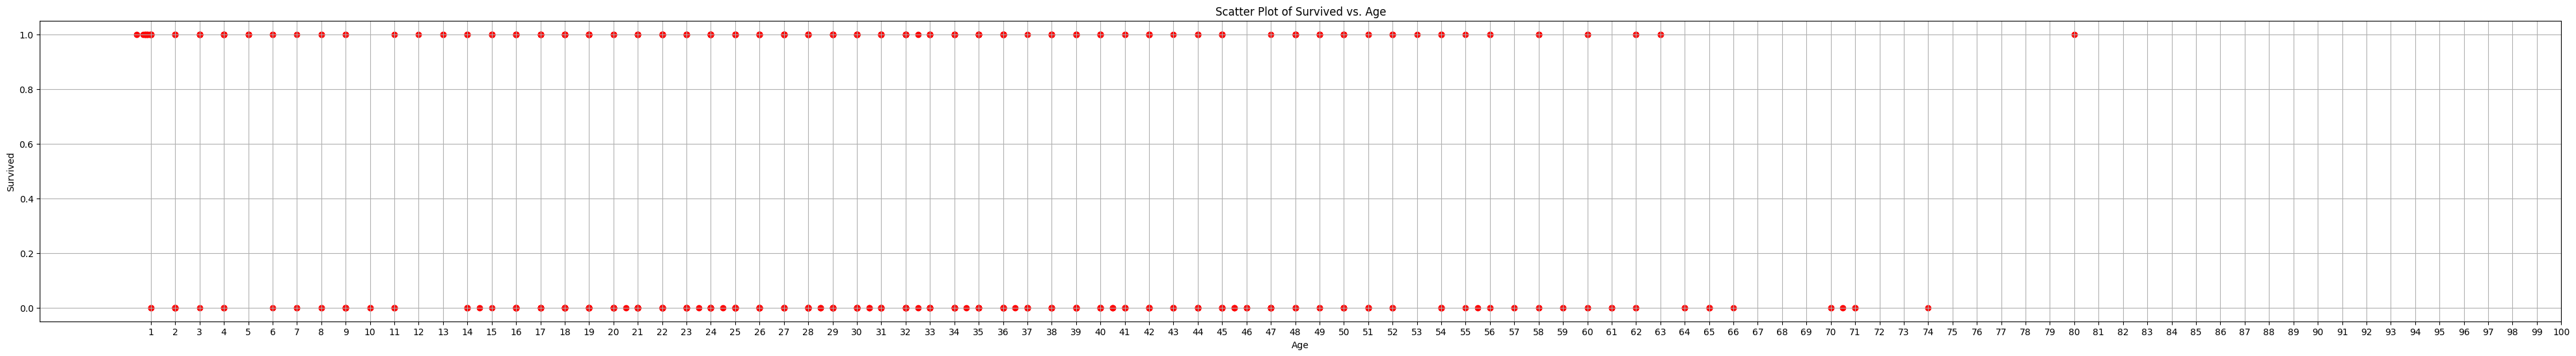

In [10]:
# Completely useless plot
# But it shows why the correlation calculation would not work.
# The data is up and down
plt.figure(figsize=(50,6))
plt.scatter(data['Age'], data['Survived'], alpha=1, color='red')
plt.title("Scatter Plot of Survived vs. Age")
plt.xlabel('Age')
plt.ylabel('Survived')
plt.xticks(range(1, 101, 1))
plt.grid(True)
plt.show()

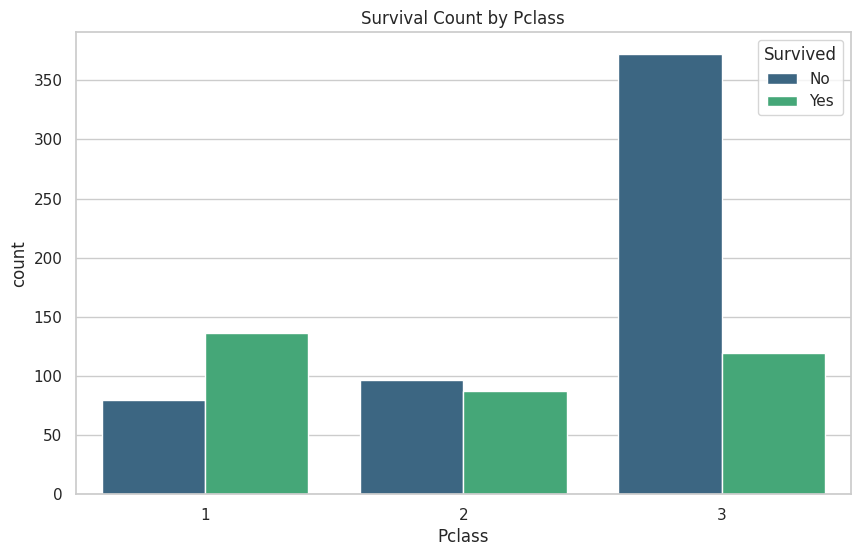

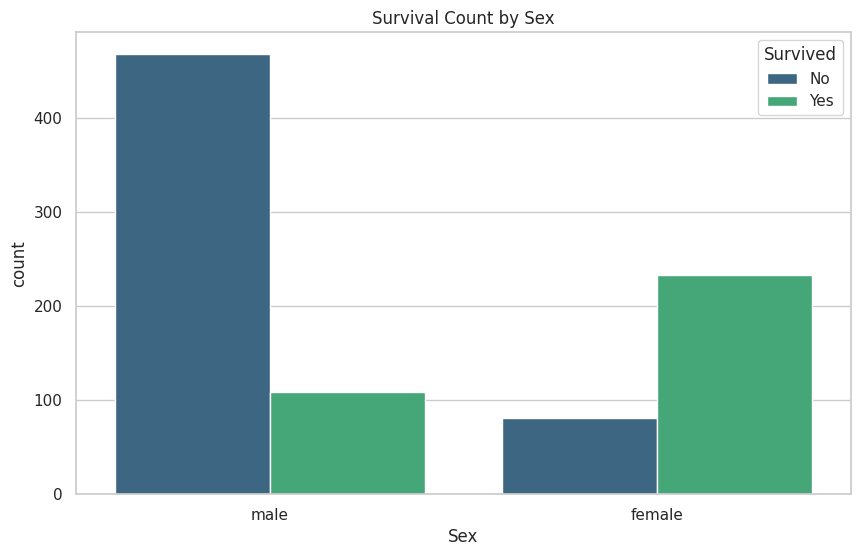

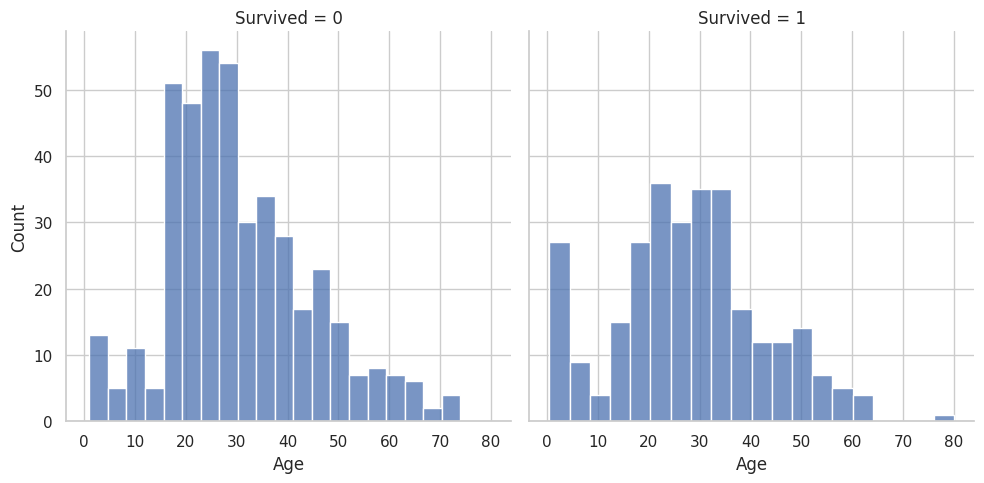

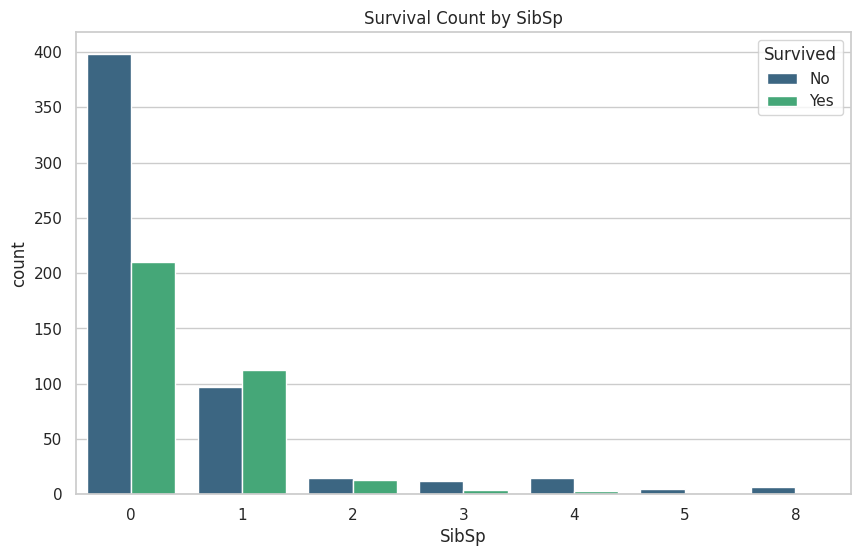

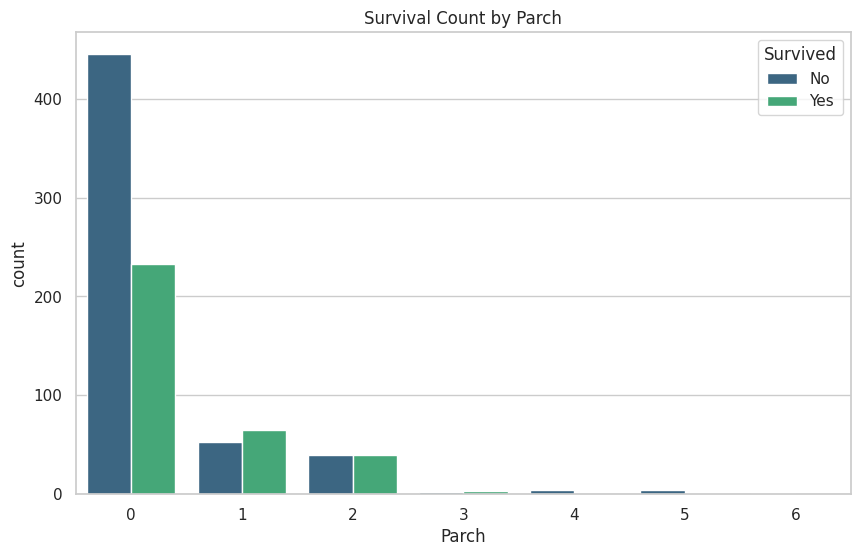

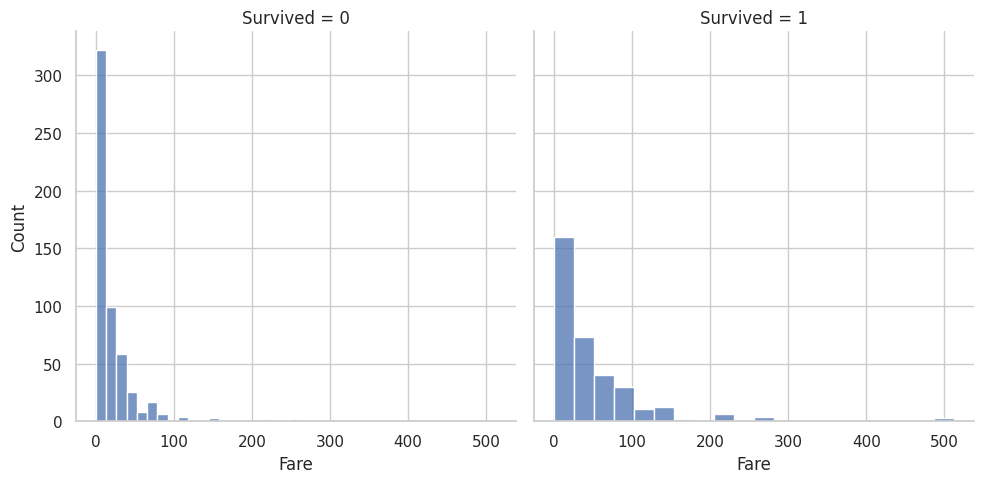

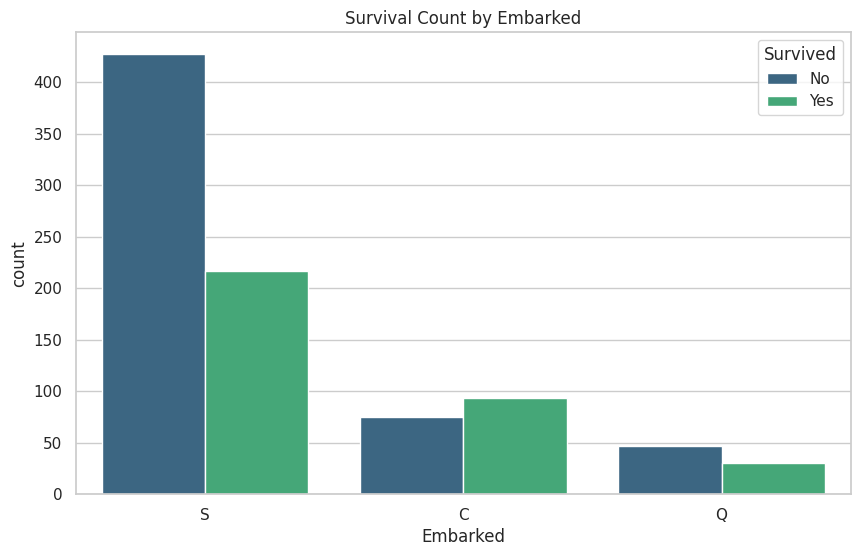

In [11]:
# These graphs are gold!
# Load and analyze the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Columns to plot, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin' due to their specificity or lack of relevance
columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Define a function to plot survival count based on a given feature
def plot_survival(data, column):
    if column=='Age' or column=='Fare':
        # Create a facet grid of Histograms for numeric data
#         print('column',column)
#         print('column != Age', column!='Age')
#         print('data[column].dtype',data[column].dtype)
        g = sns.FacetGrid(data, col='Survived', height=5, aspect=1)
        g.map(sns.histplot, column, bins=20, kde=False)
    else:
        # Create a count plot for categorical data
#         print('column 2',column)
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Survived', data=data, palette='viridis')
        plt.title(f'Survival Count by {column}')
        plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
        plt.show()

# Create a loop to generate plots for each relevant column
for column in columns_to_plot:
    plot_survival(data, column)

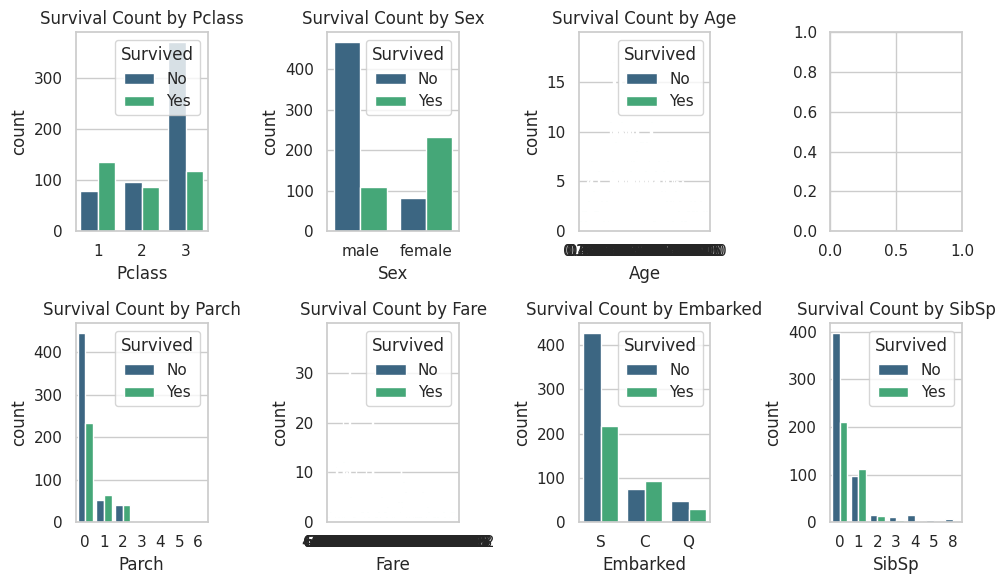

In [12]:
# These graphs are gold!
# Load and analyze the data
# Went for a tight layout does not look as good
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Columns to plot, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin' due to their specificity or lack of relevance
columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

for i, column in enumerate(columns_to_plot):
  axes_actual = axes[0 if i<3 else 1][i%4]
  sns.countplot(x=column, hue='Survived', data=data, palette='viridis', ax=axes_actual)
  axes_actual.set_title(f'Survival Count by {column}')
  axes_actual.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [13]:
# Based on the analysis of the data
# what should I expect for most likely for surviving and not surviving
# The columns we got are pClass, sex, age, sibsp, parch, ticket, fare, embarked
# Create fare bins
data['FareBin'] = pd.cut(data['Fare'], bins=[0, 10, 20, 30, 50, 100, 500])

# Compute survival counts per fare bin
fare_counts = data.pivot_table(index='FareBin', columns='Survived', aggfunc='size', fill_value=0)
# print(fare_counts)
# Calculate ratio of non-survivors to survivors
fare_counts['Ratio'] = fare_counts[0] / fare_counts[1]
# print('fare_counts\n',fare_counts)
# Find the fare bin with the highest ratio
highest_ratio_bin = fare_counts['Ratio'].idxmax()
highest_ratio_value = fare_counts.loc[highest_ratio_bin, 'Ratio']

print(highest_ratio_bin, highest_ratio_value)

(0, 10] 3.8636363636363638


In [14]:
# This is me attempting to find a statistic that will make the data make sense
# This is the ratio. Deaths/survived of each column to see which column category had the highest
    # deaths out of the survival
# I am not sure this stat makes sense. It made sense when I looked at the graph. But
# now I am like what is this even computing?
# Shouldn't it be deaths/total for each column category.
# Example: Column -> 'Fare', Column Category -> (0,10), (10,20] in 'Fare's
def find_highest_ratio(data, column):
    if column=='Fare':
        # Create fare bins
        data['FareBin'] = pd.cut(data['Fare'], bins=[0, 10, 20, 30, 50, 100, 500])

        # Compute survival counts per fare bin
        fare_counts = data.pivot_table(index='FareBin', columns='Survived', aggfunc='size', fill_value=0)
#         print(fare_counts)
        # Calculate ratio of non-survivors to survivors
        fare_counts['Ratio'] = fare_counts[0] / fare_counts[1]
        # print('fare_counts\n',fare_counts)
        # Find the fare bin with the highest ratio
        highest_ratio_bin = fare_counts['Ratio'].idxmax()
        highest_ratio_value = fare_counts.loc[highest_ratio_bin, 'Ratio']
        print('Fare')
        print(highest_ratio_bin, highest_ratio_value)
    elif column=='Embarked':
        # Create bins
#         print('data[column]',data[column])
#         print('type(data[column])',type(data[column]))
#         print('typeof(data)',type(data))
        data['Bin'] = data[column]
        survival_counts = data.pivot_table(index='Bin', columns='Survived', aggfunc='size', fill_value=0)
        print('Embarked')
        print('survival_counts',survival_counts)

# Columns to plot, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin' due to their specificity or lack of relevance
columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Create a loop to generate plots for each relevant column
for column in columns_to_plot:
    find_highest_ratio(data, column)

Fare
(0, 10] 3.8636363636363638
Embarked
survival_counts Survived    0    1
Bin               
C          75   93
Q          47   30
S         427  217


In [15]:
data.head()
data.tail()
# Preview data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBin,Bin
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,"(16.336, 32.252]","(10, 20]",S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,"(16.336, 32.252]","(20, 30]",S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN,"(20, 30]",S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,"(16.336, 32.252]","(20, 30]",C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,"(16.336, 32.252]","(0, 10]",Q


In [16]:
# Load in test data
train_df = pd.read_csv('./drive/MyDrive/Titanic_Challenge/train.csv')
test_df = pd.read_csv('./drive/MyDrive/Titanic_Challenge/test.csv')

In [17]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# Describe categorical data
# the include=['O'] means to include types that are objects
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [20]:
# P class vs Survived Mean Stat
# Mean stat is where we get the mean of the values for each category in PClass that survived
# This gives the mean of PClass that survived vs. ones that did not survive
# Survived = 0 means not survived, survived = 1 means survived
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
# Sex vs Survived Mean Stat
# total of survived(survived = 1) / total(survived=0 + survived=1)
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
# Embarked vs. Survived Mean Stat
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [23]:
# Parch vs. Survived Mean Stat
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [24]:
# Sibsp vs. Survived Mean Stat
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=True)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [25]:
# I wonder if the amount of SibSp or Parch is correlated with PClass
# train_df[['SibSp', 'Pclass']].value_counts()
train_df[['SibSp', 'Pclass']].groupby(['SibSp', 'Pclass'], as_index=False).value_counts()

,SibSp,Pclass,count
0,0,1,137
1,0,2,120
2,0,3,351
3,1,1,71
4,1,2,55
5,1,3,83
6,2,1,5
7,2,2,8
8,2,3,15
9,3,1,3


In [26]:
train_df[['Parch', 'Pclass']].groupby(['Parch', 'Pclass'], as_index=False).value_counts()

,Parch,Pclass,count
0,0,1,163
1,0,2,134
2,0,3,381
3,1,1,31
4,1,2,32
5,1,3,55
6,2,1,21
7,2,2,16
8,2,3,43
9,3,2,2


In [27]:
train_df[train_df['SibSp']== 5][['SibSp', 'Pclass']]

,SibSp,Pclass
59,5,3
71,5,3
386,5,3
480,5,3
683,5,3


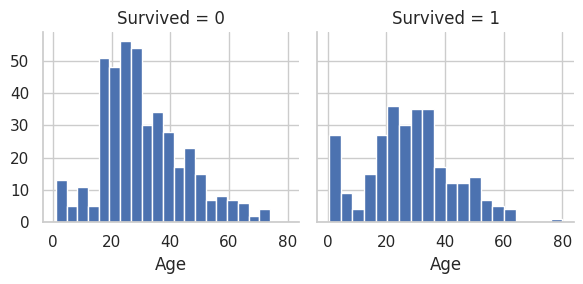

In [28]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

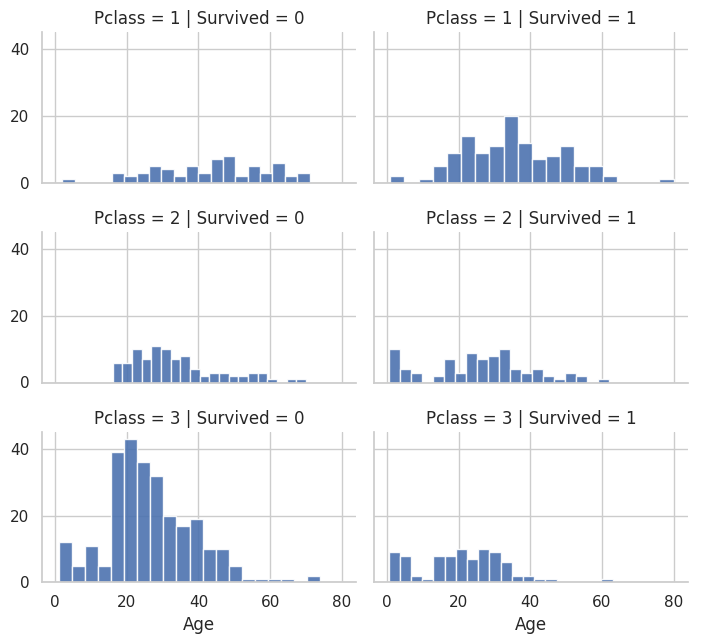

In [29]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.9, bins=20)
grid.add_legend();

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


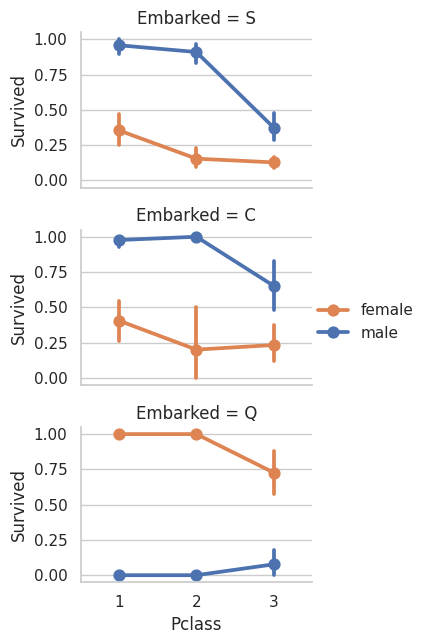

In [30]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


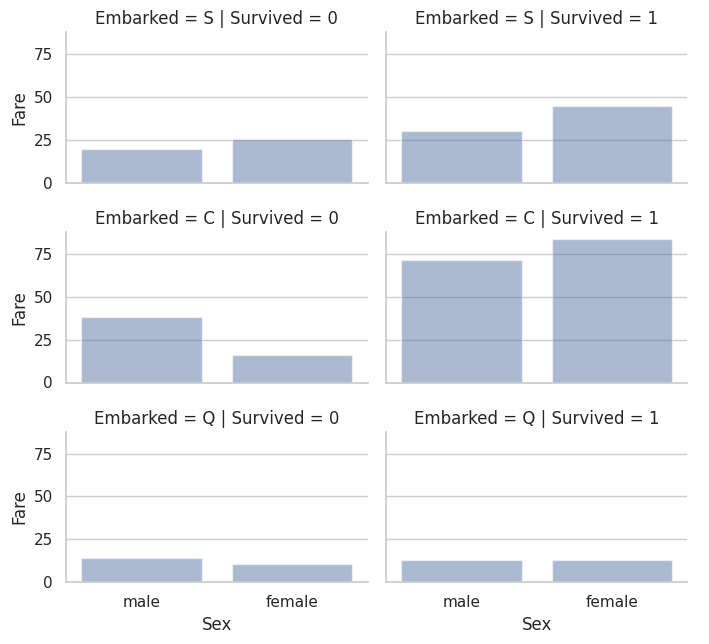

In [31]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None)
grid.add_legend()

In [32]:
# Correcting by dropping features
combine = [train_df, test_df]
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape


Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [33]:


for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])



Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [34]:


for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values('Survived')



,Title,Survived
2,Mr,0.156673
4,Rare,0.347826
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651


In [35]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [36]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [37]:


for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [38]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


891
177


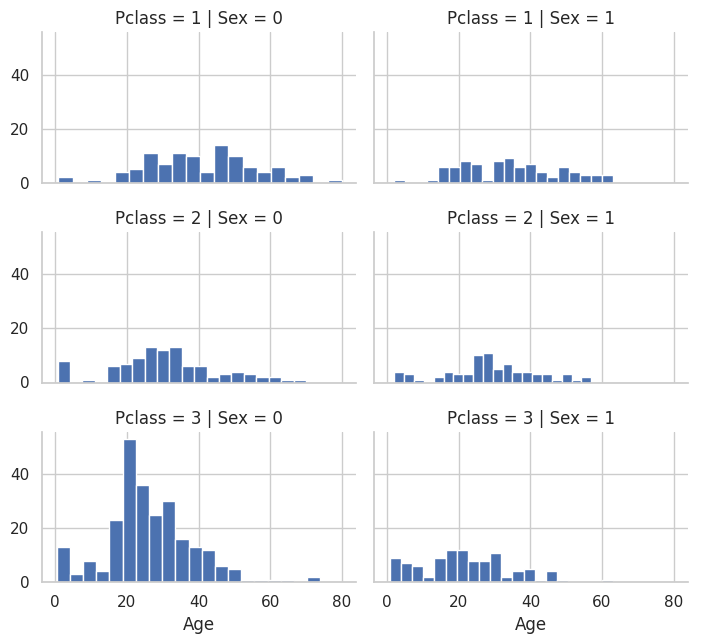

In [39]:
# Completing values for missing or null values
# For which columns?
# Age
print(len(train_df['Age']))
train_df['Age'].unique()
print(train_df['Age'].isna().sum())
# More accurate way of guessing missing values is to use other correlated features.
#  In our case we note correlation among Age, Gender, and Pclass.
#  Guess Age values using median values for Age across sets of Pclass and Gender feature combinations.
#  So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on..
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend()

In [40]:
guess_ages = np.zeros((2,3))
# Iterate over Sex (0,1) and Pclass(1,2,3) to calculate guessed values of Age for the six combinations
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    # Fill in the guessed age values where age is null in the dataset
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [41]:
# Create Age Bands and determine correlations with Survived
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)



,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [42]:
# Replace age with ordinals for these bands
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [43]:
# Remove the age band feature
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [44]:
# Create a new feature called 'FamilySize' which combines Parch and SibSp.
# This will enable us to drop Parch and SibSp from the datasets
for dataset in combine:
    # We are adding 1 to count ourselves as a person
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [45]:
# Calculate statistics for people that survived who were alone
# Vs. ones that had family
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [46]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()
# Dropping Parch and SibSp in favor of FamilySize and isAlone

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,1,2,0
1,1,1,1,2,71.2833,C,3,2,0
2,1,3,1,1,7.9250,S,2,1,1
3,1,1,1,2,53.1000,S,3,2,0
4,0,3,0,2,8.0500,S,1,1,1


In [47]:


freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [48]:
# Fill missing port values with the most frequent occurring port
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [49]:
# Convert categorical port to numeric port feature


for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,0,1,2,0
1,1,1,1,2,71.2833,1,3,2,0
2,1,3,1,1,7.9250,0,2,1,1
3,1,1,1,2,53.1000,0,3,2,0
4,0,3,0,2,8.0500,0,1,1,1


In [50]:
# The test data set had a single missing value for fare so we are filling that in
# The model algorithm needs to operate on nonnull values
# Round off the fare to two decimals because it represents currency
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,7.8292,2,1,1,1
1,893,3,1,2,7.0000,0,3,2,0
2,894,2,0,3,9.6875,2,1,1,1
3,895,3,0,1,8.6625,0,1,1,1
4,896,3,1,1,12.2875,0,3,3,0


In [51]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [52]:
# Convert the Fare Feature to ordinal values based on FareBand


for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,0,0,1,2,0
1,1,1,1,2,3,1,3,2,0
2,1,3,1,1,1,0,2,1,1
3,1,1,1,2,3,0,3,2,0
4,0,3,0,2,1,0,1,1,1
5,0,3,0,1,1,2,1,1,1
6,0,1,0,3,3,0,1,1,1
7,0,3,0,0,2,0,4,5,0
8,1,3,1,1,1,0,3,3,0
9,1,2,1,0,2,1,3,2,0


In [53]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,2,1,1,1
1,893,3,1,2,0,0,3,2,0
2,894,2,0,3,1,2,1,1,1
3,895,3,0,1,1,0,1,1,1
4,896,3,1,1,1,0,3,3,0
5,897,3,0,0,1,0,1,1,1
6,898,3,1,1,0,2,2,1,1
7,899,2,0,1,2,0,1,3,0
8,900,3,1,1,0,1,3,1,1
9,901,3,0,1,2,0,1,3,0


In [54]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
# We are ready to start training a model
# We are performing supervised learning because we are training it on our dataset
# And we are doing Classification and Regression
# print(train_df.shape)
# print(train_df.head(5))
# train_df.drop("Survived", axis=1)

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [56]:
# Logistic Regression
# Explain how it works
# We have an equation like sigmoid(Wx + b) where we are trying to learn W(coefficient) and b
# the sigmoid makes it output either 0 or 1.
# The coefficient shows how its related to the value we are trying to predict.
  # Its the linear relationship. How changing a variable can affect its output. W1x1 + w2x2 +...

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log
# logreg.coef_

80.47

In [57]:
# This shows the correlation of the features to survived
# A positive correlation means as that feature increases the value of survived
# increases as well.

# print('train_df.columns',train_df.columns)
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
# print('coeff_df.columns',coeff_df)
# print('logreg.coef_[0]',logreg.coef_[0])
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.162027
5,Title,0.465165
4,Embarked,0.260053
3,Fare,0.210964
2,Age,-0.034150
6,FamilySize,-0.393209
7,IsAlone,-0.493648
0,Pclass,-0.708737


In [58]:
# Support Vector Machines
# We are trying to find the line of best fit between the two classes.
# We are trying to find the line in between the two closest nodes (closest in relation to the other class) of the two classes

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.38

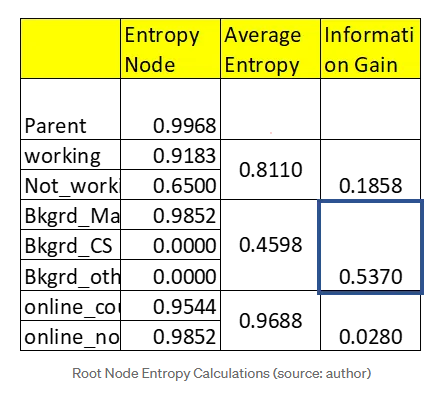

Deciding which class to split on based on Entropy calculations for Decision Tree Algorithm

In [59]:
# Decision Tree
# A Decision tree starts out with a split of classes based on which split will have the most
# information gain(for entropy calculations) and the most purity (based on gini index calculations)
# The most information gain will be on the class with the least entropy see image above
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.66

In [60]:
# Random Forest
# Wikipedia
# Random forests or random decision forests is an ensemble learning method for classification,
# regression and other tasks that operates by constructing a multitude of decision trees at training time.
# For classification tasks, the output of the random forest is the class selected by most trees.
# For regression tasks, the mean or average prediction of the individual trees is returned.
# Random decision forests correct for decision trees' habit of overfitting to their training set.
#

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.66

In [61]:
# Perceptron
# How is a Perceptron different from Logistic Regression?
# A Perceptron can use the logistic function but that is the only thing Logistic Regression can use
# Also everything about it depends on how its implemented SciKit

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

75.76

In [62]:
# K-Nearest-Neighbors (kNN)
# The average K-Nearest points to a point we are trying to classify are used to predict that point

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.19

In [63]:
# Gaussian Naive Bayes
# Regularly Naive Bayes multiplies prior probabilities to get the probability of the input
  # Find probability of classA | given word1 and word2
  # = Probability that its classA * probability that word1 occurs in classA * probability that word2 occurs in classA
# Guassian Naive Bayes is the same multiplication but the value for probability is taken from the gaussian dist. of the data
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.56

In [64]:
# Linear SVC - Support Vector Classifier
# What is a Linear SVC?
  # Its like SVM but the decision boundary is linear so its more efficient than SVM
  # This is because calculating the linear decision boundary is computationally simpler
  # than calculating non-linear decision boundaries that require transformations and complex calculations due to the kernel trick.
# Use Cases: It's best used when you have a reason to believe the data can be separated by a linear boundary or when computational efficiency is a concern.
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)
# print(linear_svc.coef_[0])
w = linear_svc.coef_[0]
print(w)

80.25
[-0.24798138  0.85192926 -0.04337095  0.05434692  0.07868199  0.17947599
 -0.14804132 -0.18753885]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [65]:
# Stochastic Gradient Descent
# Linear classifiers (SVM, logistic regression, etc.) with SGD training. (From docs)
# The reason its stochastic is because we are using mini-batches for computing the gradient of the loss function
  # as opposed to the entire dataset
  # and then with the gradients we make updates

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.55

In [68]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.66
8,Decision Tree,88.66
1,KNN,85.19
0,Support Vector Machines,82.38
2,Logistic Regression,80.47
7,Linear SVC,80.25
4,Naive Bayes,78.56
6,Stochastic Gradient Decent,77.55
5,Perceptron,75.76


In [71]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission.csv', index=False)